In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import random
from sympy import symbols, solve, Eq
import math
from datetime import datetime
from datetime import timedelta

<h1><center> <font color=red>Aodong Weight Loss Progress </center></h1>
    
> #### All data provided by Renpho bluetooth scale. 
> #### Body composition data only available after Day 41 (08/17/2022)
> #### Due to COVID symptoms, training stopped on 10/17/2022 and resumed on 10/20/2022. Data from 10/16/2022-10/19/2022 will be discarded (Screened with df['Remarks'] == 'COVID'). 
> #### Data on days after a rest day is discarded (Screened with df['Remarks'] == 'REST').

### Helper Functions: 

In [2]:
def getBestLineFit(xx, yy, axess, displayEqn):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    c = '#c99aff'
    axess.plot(x, a*x+b, color=c, linestyle='--', linewidth=2)
    if(displayEqn):
        axess.text(0.21, 0.97, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', color=c, 
                   size=20, horizontalalignment='center', verticalalignment='center', transform=axess.transAxes)

In [34]:
def labelPoints(interval, x, y, axess):
    a = x.max() - x.min()
    b = y.max() - y.min()
    
    # distance between last interval multiple and last data point
    distToLastPoint = interval//2+1
    
    # plot points for interval multiples
    for i in range(a - distToLastPoint +1):
        if(i % interval == 0):
            axess.text(x[i]+0.006*a,y[i]+0.016*b,'Day ' + str(x[i]) + ': ' + '{:.2f}'.format(y[i]))
            
    # label last data point
    axess.text(x[-1]+0.006*a,y[-1]+0.016*b,'Day ' + str(x[-1]) + ': ' + '{:.2f}'.format(y[-1]))

In [35]:
def plotSegment(start, end, axess,c,showDataPoints=True, joinLine = False):
    x = df['Day'][start:end]
    y = df['Weight(lb)'][start:end]
    a, b = np.polyfit(x, y, 1)
    m = 'None' if (not showDataPoints) else 'o'
    l = 'None' if (not joinLine) else 'dotted'
    axess.plot(x, y, color=c, marker=m, ms = 4, linestyle=l)
    axess.plot(x, a*x+b, label='Day' + str(start+1) + '-' + str(end) + ': y='+'{:.4f}'.format(b)+'{:.4f}'.format(a)+'x',linestyle='--',color=c,lw=2)    

In [36]:
def CalculateDaysToAchieveGoal(xx, yy, goal, restDayCount):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    
    k = symbols('k')
    eqn_to_solve = Eq(b + a * k, goal)
    sol = math.ceil(solve(eqn_to_solve)[0]) + restDayCount
    
    print('Days needed to achieve the goal of ' + str(goal) + ': ' + str(sol) + ' Days')

    beginDateString = "2022-07-06"
    beginDate = datetime.strptime(beginDateString, "%Y-%m-%d")
    print("Beginning date:")
    print(beginDate)
  
    endDate = beginDate + timedelta(days=int(sol))
    print("Ending date:")
    print(endDate)

***

### Overall Trend

In [37]:
df = pd.read_csv ('/Users/aodongliu/Random/weightloss/data/renpho_data_11072022.csv')
df = df[::-1]

In [38]:
df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ]

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day,DayFull
22,"10/16/2022, 12:34:42",239.4,30.7,17.8,197,14.3,13,59.4,53.1,187.2,9.8,18.8,2299,27,COVID,0,102
21,"10/17/2022, 11:51:00",238.4,30.6,17.6,196.2,14.2,13,59.5,53.2,186.6,9.8,18.8,2292,27,COVID,0,103
20,"10/18/2022, 09:29:42",237.4,30.5,17.6,195.8,14.1,13,59.5,53.3,186,9.8,18.8,2287,27,COVID,0,104
19,"10/19/2022, 10:47:17",237.0,30.4,17.5,195.4,14.1,13,59.5,53.3,185.6,9.8,18.8,2284,27,COVID,0,105
11,"10/27/2022, 09:00:08",229.4,29.5,16.8,191,13.6,12,60.1,53.8,181.4,9.6,19,2241,26,REST,0,113


In [39]:
restDayCount = len( df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ] )
# Remove data during COVID recovery
df = df[ (df['Remarks'] != 'REST') & (df['Remarks'] != 'COVID') ]
pd.set_option('display.max_rows', None)
df

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day,DayFull
123,"07/06/2022, 07:30:00",324.8,41.7,--,--,--,--,--,--,--,--,--,--,--,--,1,1
122,"07/07/2022, 07:53:50",322.6,41.4,--,--,--,--,--,--,--,--,--,--,--,--,2,2
121,"07/08/2022, 07:43:33",322.0,41.3,--,--,--,--,--,--,--,--,--,--,--,--,3,3
120,"07/09/2022, 11:03:08",323.0,41.4,--,--,--,--,--,--,--,--,--,--,--,--,4,4
119,"07/10/2022, 13:17:02",321.4,41.3,--,--,--,--,--,--,--,--,--,--,--,--,5,5
118,"07/11/2022, 07:24:57",322.8,41.4,--,--,--,--,--,--,--,--,--,--,--,--,6,6
117,"07/14/2022, 09:29:34",319.4,41.0,--,--,--,--,--,--,--,--,--,--,--,--,7,7
116,"07/15/2022, 08:10:59",318.8,40.9,--,--,--,--,--,--,--,--,--,--,--,--,8,8
115,"07/16/2022, 10:41:55",317.2,40.7,--,--,--,--,--,--,--,--,--,--,--,--,9,9
114,"07/17/2022, 09:36:07",320.2,41.1,--,--,--,--,--,--,--,--,--,--,--,--,10,10


In [61]:
# Extract body composition data from dataframe since they are only available after day 41
daysAfter40 = df['Day'][40:]
bodyFatData =  np.array([float(i) for i in df['Body Fat(%)'][40:]])
visceralFatData =  np.array([float(i) for i in df['Visceral Fat'][40:]])

# Set y-tick spacing
num_ticks = 9
weight_interval = ( df['Weight(lb)'].max() - df['Weight(lb)'].min() ) // (num_ticks-1)
BMI_interval = ( df['BMI'].max() - df['BMI'].min() ) // (num_ticks-1)
bodyFact_interval = 1

# Whether to show best line fit equation on the graph
displayEqn = True

# Whether to label datapoints every user-defined interval
labelProgress = True
if(labelProgress): labelInterval = 7 

In [62]:
( df['Weight(lb)'].max() - df['Weight(lb)'].min()) // 9

11.0

In [67]:
math.ceil( df['BMI'].max() - df['BMI'].min() )

14

In [64]:
( df['BMI'].max() - df['BMI'].min() ) // (num_ticks-1)

1.0

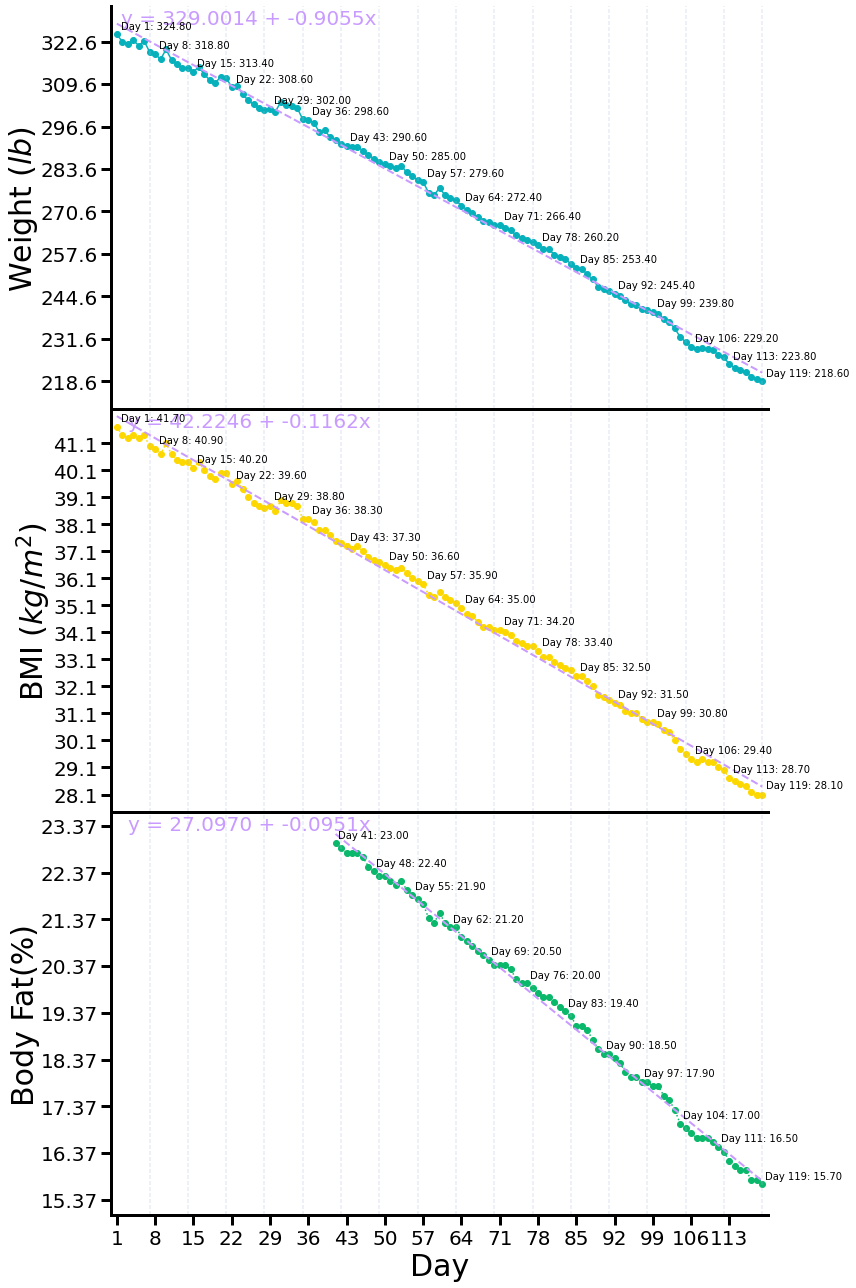

In [63]:
fig, ax = plt.subplots(3, 1,figsize =(12, 18), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)


ax[0].plot(df['Day'], df['Weight(lb)'], marker='o', linestyle = '-', color ='#07b1bc',  label ='Weight')
ax[0].set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax[0].set_yticks(np.arange(df['Weight(lb)'].min(),df['Weight(lb)'].max(),weight_interval))
ax[0].set_ylabel('Weight ($lb$)',fontsize=30,labelpad = 0.4) 
getBestLineFit(df['Day'], df['Weight(lb)'], ax[0], displayEqn)
if (labelProgress): labelPoints(labelInterval, np.array(list(df['Day'])),np.array(list(df['Weight(lb)'])), ax[0])
    

ax[1].plot(df['Day'], df['BMI'], marker='o', linestyle = ':', color ='#fdd800')
ax[1].set_ylim(df['BMI'].min()-0.66*BMI_interval,df['BMI'].max()+0.66*BMI_interval)
ax[1].set_yticks(np.arange(df['BMI'].min(),df['BMI'].max(),BMI_interval))
ax[1].set_ylabel('BMI ($kg/m^2$)',fontsize=30,labelpad = 0.4)
getBestLineFit(df['Day'], df['BMI'], ax[1], displayEqn)
if (labelProgress): labelPoints(labelInterval, np.array(list(df['Day'])),np.array(list(df['BMI'])), ax[1])
    
    
ax[2].plot(daysAfter40, bodyFatData, marker='o', linestyle = ':', color ='#0ab86b')
ax[2].set_ylim(bodyFatData.min()-0.66*bodyFact_interval, bodyFatData.max()+0.66*bodyFact_interval)
ax[2].set_yticks(np.arange(bodyFatData.min()-0.33*bodyFact_interval,bodyFatData.max()+0.66*bodyFact_interval,bodyFact_interval))
ax[2].set_ylabel('Body Fat(%)',fontsize=30,labelpad = 0.4)
getBestLineFit(daysAfter40, bodyFatData, ax[2], displayEqn)
if (labelProgress): labelPoints(labelInterval, np.array(list(daysAfter40)), np.array(list(bodyFatData)), ax[2])

    
ax[2].tick_params(axis='x', labelsize=20)
ax[2].set_xlim(0,df['Day'].max()+1)
ax[2].set_xticks(np.arange(1, df['Day'].max()+1,7))


ax[0].spines['top'].set_visible(False)
ax[1].spines["top"].set_linewidth(3)
ax[2].spines["top"].set_linewidth(3)

for i in range(3):
    ax[i].spines["left"].set_linewidth(3)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines["bottom"].set_linewidth(3)
    
    ax[i].tick_params(axis='y', labelsize=20)
    
    ax[i].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
    ax[i].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
    
    # Add vertical lines in between each week to help visualize progress
    for j in np.arange(0, df['Day'].max()+1,7):
        ax[i].axvline(x=j,linewidth=0.4, color='#a7b9d7', linestyle=(0, (10, 5)))
             
plt.xlabel("Day",fontsize=30)
plt.savefig('/Users/aodongliu/Random/weightloss/plots/11072022.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Segmented Trend 

In [43]:
# divide all data into groups to monitor the change in weight loss trend
day_interval = 10

nums_segments = df['Day'].size // day_interval

hexadecimal_alphabets = '0123456789ABCDEF'

# randomly create different colors to differentiate different segments
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(nums_segments+1)]

# whether to show data points on the graph
showDataPoints = True

# whether to connect the data points
joinLine = False

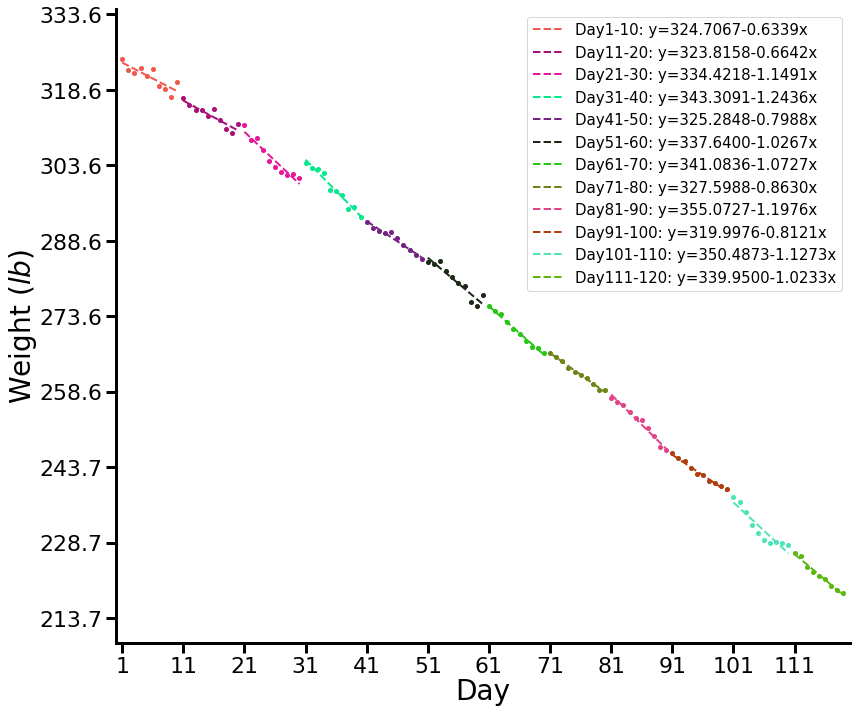

In [44]:
fig, ax1 = plt.subplots(1,1, figsize=(12,10), tight_layout=True)

# plot weight trend for every user-specified inteval 
for i in range(nums_segments):
    nexti = (i+1)* day_interval
    plotSegment(i*day_interval,nexti,ax1,colors[i], showDataPoints, joinLine )

# if we have more than 3 leftover data points, plot them on the graph as the final segment
if(df['Day'].size - nums_segments*day_interval > 3): plotSegment(nums_segments*day_interval, df['Day'].size+1, ax1, colors[-1], showDataPoints, joinLine)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines["left"].set_linewidth(3)
ax1.spines["bottom"].set_linewidth(3)

ax1.set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax1.set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax1.set_ylabel('Weight ($lb$)',fontsize=28,labelpad = 0.4)

ax1.set_xlim(0,df['Day'].max()+1)
ax1.set_xticks(np.arange(1, df['Day'].max()+1,day_interval))
ax1.set_xlabel('Day',fontsize=28,labelpad = 0.4)

ax1.tick_params(direction='out', axis ='y', which ='both', length=10, width=3,labelsize=22)
ax1.tick_params(direction='out', axis ='x', which ='both', length=10, width=3,labelsize=22)

plt.legend(fontsize=15)

plt.tight_layout()
plt.savefig('/Users/aodongliu/Random/weightloss/plots/segmented_trend.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Date/Goal Calculator

### Not Fat Level (BMI <= 30):

In [23]:
weight_goal = 2.206 * 1.88 * 1.88 * 30
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 233.90659199999993: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [24]:
bmi_goal = 30
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 30: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [25]:
bodyFat_goal = 17
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 17: 112 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-26 00:00:00


In [26]:
visceralFat_goal = 11
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 11: 122 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-05 00:00:00


### Minimum Level:

In [27]:
weight_goal = 220.6
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 220.6: 125 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-08 00:00:00


In [28]:
bmi_goal = 28
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 28: 128 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-11 00:00:00


In [29]:
bodyFat_goal = 15
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 15: 133 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-16 00:00:00


In [30]:
visceralFat_goal = 9
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 9: 140 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-23 00:00:00


### Ideal Level:

In [31]:
weight_goal = 205
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 205: 142 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-25 00:00:00


In [32]:
bmi_goal = 25
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 25: 154 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-07 00:00:00


In [33]:
bodyFat_goal = 13
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 13: 154 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-07 00:00:00


In [34]:
visceralFat_goal = 6
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 6: 167 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-20 00:00:00


In [38]:
(328-50*2.206)/2.206

98.68540344514959

In [35]:
218.6/2.206

99.09338168631007

In [36]:
324.8-50*2.206

214.5

In [40]:
25*1.86*1.86*2.206

190.79694

In [41]:
(324.8-218.6)

106.20000000000002

In [42]:
106.20000000000002/2.206

48.14143245693564